##주가연계펀드
주가연계펀드(Equity-Linked Fund, ELF)는 기초 자산의 성과에 따라 수익이 결정되는 펀드입니다. 주로 여러 주식이나 주가지수를 기초 자산으로 하며, 다양한 구조와 전략을 통해 수익을 추구합니다.


In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


[*********************100%%**********************]  3 of 3 completed


초기 가격: [129.41000366  86.3065033  217.69000244]
최종 가격: [129.92999268  88.23000336 239.82000732]
수익률: 0.04
최종 투자 금액: 103879.08
수익: 3879.08


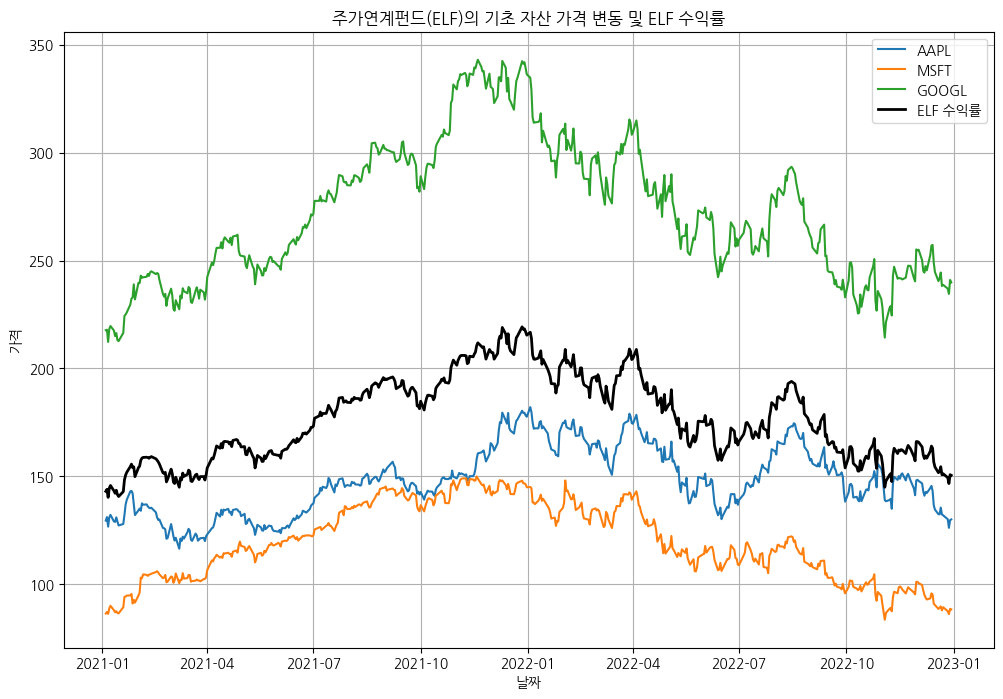

In [4]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# ELF의 수익률 계산 함수
def elf_return(initial_prices, final_prices, weights):
    """
    initial_prices: 기초 자산의 초기 가격 배열
    final_prices: 기초 자산의 만기 시점 가격 배열
    weights: 각 기초 자산의 비중 배열
    """
    price_returns = (final_prices - initial_prices) / initial_prices
    weighted_returns = price_returns * weights
    total_return = np.sum(weighted_returns)
    return total_return

# 실제 데이터 가져오기
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start="2021-01-01", end="2023-01-01")
initial_prices = data['Close'].iloc[0].values  # 초기 가격
final_prices = data['Close'].iloc[-1].values  # 만기 시점 가격

# 기본 변수 설정
weights = np.array([0.4, 0.3, 0.3])  # 각 기초 자산의 비중

# ELF의 수익률 계산
total_return = elf_return(initial_prices, final_prices, weights)
initial_investment = 100000  # 초기 투자 금액
final_investment = initial_investment * (1 + total_return)
profit = final_investment - initial_investment

print(f"초기 가격: {initial_prices}")
print(f"최종 가격: {final_prices}")
print(f"수익률: {total_return:.2f}")
print(f"최종 투자 금액: {final_investment:.2f}")
print(f"수익: {profit:.2f}")

# ELF 수익률 시계열 계산
price_matrix = data['Close'].values
weighted_prices = np.dot(price_matrix, weights)

# 시각화
dates = data['Close'].index
prices = data['Close'].values

plt.figure(figsize=(12, 8))
for i, ticker in enumerate(tickers):
    plt.plot(dates, prices[:, i], label=ticker)
plt.plot(dates, weighted_prices, label='ELF 수익률', linewidth=2, color='black')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('주가연계펀드(ELF)의 기초 자산 가격 변동 및 ELF 수익률')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  5 of 5 completed


초기 가격: [129.41000366 159.33149719  86.3065033  217.69000244 243.25666809]
최종 가격: [129.92999268  84.          88.23000336 239.82000732 123.18000031]
수익률: -0.17
최종 투자 금액: 83230.90
수익: -16769.10


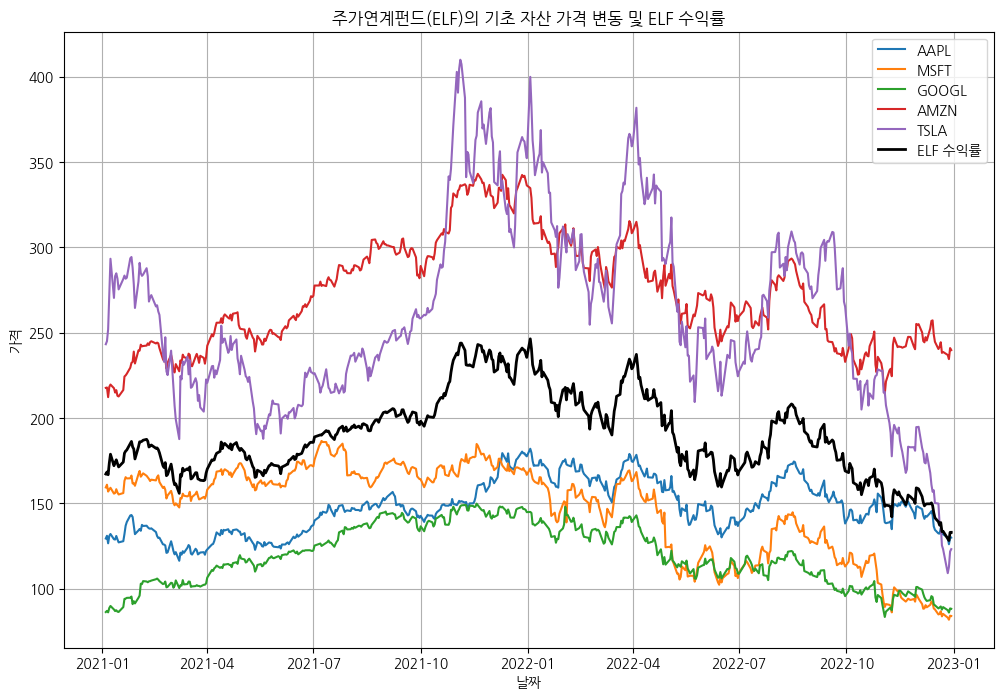

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# ELF의 수익률 계산 함수
def elf_return(initial_prices, final_prices, weights):
    """
    initial_prices: 기초 자산의 초기 가격 배열
    final_prices: 기초 자산의 만기 시점 가격 배열
    weights: 각 기초 자산의 비중 배열
    """
    price_returns = (final_prices - initial_prices) / initial_prices
    weighted_returns = price_returns * weights
    total_return = np.sum(weighted_returns)
    return total_return

# 실제 데이터 가져오기
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start="2021-01-01", end="2023-01-01")
initial_prices = data['Close'].iloc[0].values  # 초기 가격
final_prices = data['Close'].iloc[-1].values  # 만기 시점 가격

# 기본 변수 설정
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # 각 기초 자산의 비중

# ELF의 수익률 계산
total_return = elf_return(initial_prices, final_prices, weights)
initial_investment = 100000  # 초기 투자 금액
final_investment = initial_investment * (1 + total_return)
profit = final_investment - initial_investment

print(f"초기 가격: {initial_prices}")
print(f"최종 가격: {final_prices}")
print(f"수익률: {total_return:.2f}")
print(f"최종 투자 금액: {final_investment:.2f}")
print(f"수익: {profit:.2f}")

# ELF 수익률 시계열 계산
price_matrix = data['Close'].values
weighted_prices = np.dot(price_matrix, weights)

# 시각화
dates = data['Close'].index
prices = data['Close'].values

plt.figure(figsize=(12, 8))
for i, ticker in enumerate(tickers):
    plt.plot(dates, prices[:, i], label=ticker)
plt.plot(dates, weighted_prices, label='ELF 수익률', linewidth=2, color='black')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('주가연계펀드(ELF)의 기초 자산 가격 변동 및 ELF 수익률')
plt.legend()
plt.grid(True)
plt.show()
